In [2]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
#data_raw=pd.read_csv('C://Users//DELL//Desktop//assignments for adwisor//data set for practice//bank-loan.csv')
data_raw=pd.read_csv('/content/drive/MyDrive/bank-loan.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data=data_raw.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [7]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [8]:
##Data exploration
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [9]:
data.ed.unique()

array([3, 1, 2, 4, 5])

In [10]:
## as  we can see that there are 15 entries missing from the "default columns we would need to fill those using various tecnhiques.
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=1,weights="uniform")

In [11]:
data_complete=imputer.fit_transform(data)
data_complete=pd.DataFrame(data_complete, columns=data.columns)

In [12]:
data_complete.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0


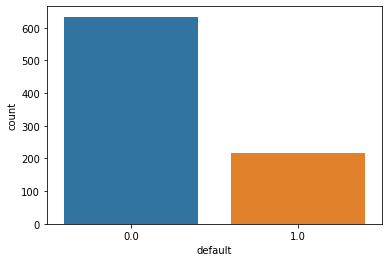

In [13]:
sns.countplot(data=data_complete, x='default')

In [14]:
## from here we can see that normal splitting will not work as it will cause the problem of bais we would need to use stratifies sampling
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(data_complete, data_complete['default']):
  train_set=data_complete.loc[train_index]
  test_set=data_complete.loc[test_index]

In [15]:
train_set['default'].value_counts()

0.0    507
1.0    173
Name: default, dtype: int64

In [16]:
test_set['default'].value_counts()

0.0    127
1.0     43
Name: default, dtype: int64

In [17]:
## Now we should look for correlations
corr_matrix=train_set.corr()
corr_matrix['default'].sort_values(ascending=False)

default     1.000000
debtinc     0.405290
creddebt    0.229406
othdebt     0.152428
ed          0.089045
income     -0.089528
age        -0.161828
address    -0.214711
employ     -0.296869
Name: default, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_train=train_set.drop(['default'], axis=1)
Y_train=train_set['default']
X_test=test_set.drop(['default'], axis=1)
Y_test=test_set['default']

In [20]:
from sklearn.pipeline import Pipeline
my_pipeline=Pipeline([('imputer',KNNImputer(n_neighbors=1,weights="uniform")),
                      ('scaler',StandardScaler()),])

In [21]:
train_final=my_pipeline.fit_transform(X_train)

In [22]:
X_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt
448,46.0,3.0,3.0,13.0,43.0,13.2,3.042336,2.633664
324,40.0,2.0,5.0,12.0,35.0,16.4,1.584240,4.155760
714,37.0,2.0,15.0,11.0,108.0,11.8,5.250528,7.493472
238,37.0,2.0,11.0,4.0,75.0,3.5,0.632625,1.992375
835,36.0,1.0,19.0,8.0,45.0,12.1,0.920205,4.524795
...,...,...,...,...,...,...,...,...
572,41.0,1.0,23.0,2.0,91.0,13.7,0.573482,11.893518
410,45.0,2.0,21.0,26.0,132.0,3.0,2.558160,1.401840
325,54.0,1.0,25.0,12.0,120.0,26.5,14.596200,17.203800
322,41.0,1.0,16.0,22.0,49.0,1.6,0.431200,0.352800


Creating a logistic regression model

In [23]:

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(train_final,Y_train)

LogisticRegression()

In [24]:
## predicting the test data
test_final=my_pipeline.fit_transform(X_test)

In [25]:
preidctions_lr=LR.predict(test_final)

In [26]:
CM=confusion_matrix(preidctions_lr,Y_test)
print(CM)

[[121  23]
 [  6  20]]


In [27]:
print(classification_report(preidctions_lr,Y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       144
         1.0       0.47      0.77      0.58        26

    accuracy                           0.83       170
   macro avg       0.71      0.80      0.74       170
weighted avg       0.88      0.83      0.85       170



In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
## predicting the probabilities
lr_prob=LR.predict_proba(X_test)

In [30]:
lr_prob=lr_prob[:,1]
ns_probs = [0 for _ in range(len(Y_test))]


In [31]:
ns_auc=roc_auc_score(Y_test,ns_probs)
lr_auc=roc_auc_score(Y_test,lr_prob)

In [32]:
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_prob)

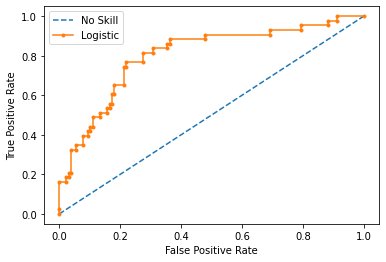

In [33]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [34]:
### precision recall curve for logistic regression
from sklearn.metrics import precision_recall_curve,f1_score,auc

In [35]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_prob)

In [36]:
lr_f1=f1_score(Y_test, preidctions_lr)

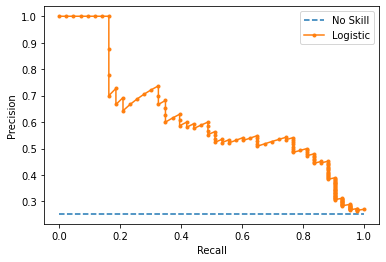

In [37]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [38]:
## now  trying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
prediction_dtc=DTC.predict(test_final)

In [40]:
dtc_prob=DTC.predict_proba(test_final)
dtc_prob=dtc_prob[:,1]

In [41]:
CM_dtc=confusion_matrix(Y_test,prediction_dtc)

In [42]:
print(classification_report(Y_test,prediction_dtc))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83       127
         1.0       0.27      0.07      0.11        43

    accuracy                           0.72       170
   macro avg       0.51      0.50      0.47       170
weighted avg       0.63      0.72      0.65       170



In [43]:
## creating precison recall curve 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score,PrecisionRecallDisplay

In [44]:
precision_dtc,recall_dtc,_= precision_recall_curve(Y_test, dtc_prob)

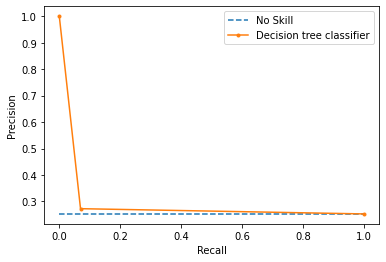

In [45]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_dtc, precision_dtc, marker='.', label='Decision tree classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [46]:
## using other classification for better accuracy
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_final,Y_train)
predictions_rf=rf.predict(test_final)

In [47]:
confusion_matrix(Y_test,predictions_rf)

array([[118,   9],
       [ 22,  21]])

In [48]:
print(classification_report(Y_test, predictions_rf))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       127
         1.0       0.70      0.49      0.58        43

    accuracy                           0.82       170
   macro avg       0.77      0.71      0.73       170
weighted avg       0.81      0.82      0.81       170



In [49]:
f1_rf=f1_score(Y_test,predictions_rf)
f1_rf

0.5753424657534246

In [50]:
rf_prob=rf.predict_proba(test_final)
rf_prob=rf_prob[:,1]

In [51]:
precision_rf,recall_rf,_ =precision_recall_curve(Y_test,rf_prob)

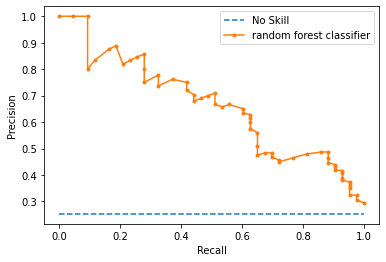

In [52]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_rf, precision_rf, marker='.', label='random forest classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [53]:
## using support vector machine for classification
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
model=svm.LinearSVC(random_state=20)
model.fit(train_final, Y_train)
predictions_svm=model.predict(test_final)

In [54]:
CM_svm=confusion_matrix(Y_test, predictions_svm)
print(CM_svm)

[[122   5]
 [ 25  18]]


In [55]:
print(classification_report(Y_test, predictions_svm))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       127
         1.0       0.78      0.42      0.55        43

    accuracy                           0.82       170
   macro avg       0.81      0.69      0.72       170
weighted avg       0.82      0.82      0.80       170



In [56]:
f1_svm=f1_score(Y_test, predictions_svm)
print(f1_svm)

0.5454545454545454


In [57]:
## using the adaboost classifier 
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(n_estimators=100)

In [58]:
adb.fit(train_final,Y_train)

AdaBoostClassifier(n_estimators=100)

In [59]:
predicted_adb=adb.predict(test_final)

In [60]:
CM_adb=confusion_matrix(Y_test, predicted_adb)
print(CM_adb)

[[117  10]
 [ 17  26]]


In [61]:
print(classification_report(Y_test, predicted_adb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       127
         1.0       0.72      0.60      0.66        43

    accuracy                           0.84       170
   macro avg       0.80      0.76      0.78       170
weighted avg       0.83      0.84      0.84       170



In [62]:
f1_adb=f1_score(Y_test,predicted_adb)
f1_adb

0.6582278481012659

In [63]:
adb_prob=adb.predict_proba(test_final)
adb_prob=adb_prob[:,1]

In [64]:
precision_adb,recall_adb,_=precision_recall_curve(Y_test,adb_prob)

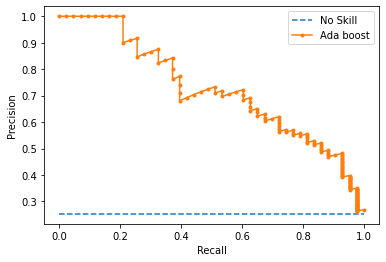

In [65]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_adb, precision_adb, marker='.', label='Ada boost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [66]:
## trying the gradient boost alogorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
model=gbc.fit(train_final, Y_train)
predicted_gbc=gbc.predict(test_final)
gbc_prob=gbc.predict_proba(test_final)
gbc_prob=gbc_prob[:,1]

In [67]:
confusion_matrix_gbc=confusion_matrix(Y_test,predicted_gbc)

In [68]:
print(confusion_matrix_gbc)

[[114  13]
 [ 21  22]]


In [69]:
print(classification_report(Y_test,predicted_gbc))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       127
         1.0       0.63      0.51      0.56        43

    accuracy                           0.80       170
   macro avg       0.74      0.70      0.72       170
weighted avg       0.79      0.80      0.79       170



In [70]:
precision_gbc,recall_gbc,_ = precision_recall_curve(Y_test,gbc_prob)

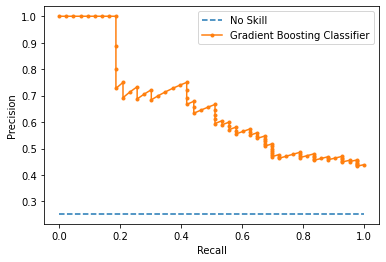

In [71]:
## plotting the precision recall curve
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_gbc, precision_gbc, marker='.', label='Gradient Boosting Classifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [72]:
f1_gbc=f1_score(Y_test,predicted_gbc)
f1_gbc

0.5641025641025641

From all the above algorithms we can see that the best F1_score was for ada boost 

In [73]:
## using pycaret to make a better model
#! pip install pycaret

In [74]:
# pip install Streamlit
#! pip install pycaret

In [75]:
from pycaret.classification import *
setting_up=setup(data=train_set, target='default',session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(680, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [76]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8193,0.8738,0.5385,0.7523,0.6169,0.5044,0.5225,0.342
et,Extra Trees Classifier,0.8170,0.8793,0.5154,0.7500,0.5974,0.4869,0.5083,0.474
catboost,CatBoost Classifier,0.8148,0.8838,0.5692,0.7156,0.6203,0.5018,0.5157,1.491
rf,Random Forest Classifier,0.8127,0.8732,0.5538,0.7214,0.6143,0.4948,0.5095,0.526
gbc,Gradient Boosting Classifier,0.8084,0.8585,0.5615,0.7007,0.6119,0.4882,0.5008,0.121
ridge,Ridge Classifier,0.8066,0.0000,0.4769,0.7670,0.5717,0.4570,0.4871,0.019
lda,Linear Discriminant Analysis,0.8066,0.8709,0.5077,0.7378,0.5846,0.4666,0.4889,0.021
lightgbm,Light Gradient Boosting Machine,0.8064,0.8614,0.5769,0.6680,0.6144,0.4874,0.4925,0.057
xgboost,Extreme Gradient Boosting,0.7938,0.8543,0.5769,0.6383,0.6007,0.4633,0.4678,3.954
nb,Naive Bayes,0.7855,0.8306,0.6000,0.6293,0.5977,0.4547,0.4669,0.020


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
xgboost=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7708,0.7846,0.4615,0.6000,0.5217,0.3744,0.3800
1,0.8125,0.8813,0.4615,0.7500,0.5714,0.4600,0.4822
2,0.7708,0.8945,0.4615,0.6000,0.5217,0.3744,0.3800
3,0.7917,0.8879,0.6154,0.6154,0.6154,0.4725,0.4725
4,0.7708,0.8593,0.6923,0.5625,0.6207,0.4590,0.4641
5,0.8511,0.9208,0.7692,0.7143,0.7407,0.6365,0.6373
6,0.7872,0.7941,0.5385,0.6364,0.5833,0.4418,0.4446
7,0.7447,0.8122,0.4615,0.5455,0.5000,0.3302,0.3322
8,0.8298,0.8348,0.6923,0.6923,0.6923,0.5747,0.5747
9,0.8085,0.8733,0.6154,0.6667,0.6400,0.5098,0.5106


In [78]:
tuned_model=tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8044,0.4615,0.5455,0.5000,0.3349,0.3369
1,0.8125,0.8769,0.6154,0.6667,0.6400,0.5135,0.5143
2,0.8542,0.9033,0.6923,0.7500,0.7200,0.6216,0.6225
3,0.7708,0.8923,0.6923,0.5625,0.6207,0.4590,0.4641
4,0.8125,0.8352,0.7692,0.6250,0.6897,0.5574,0.5635
5,0.8511,0.9253,0.7692,0.7143,0.7407,0.6365,0.6373
6,0.8936,0.8167,0.7692,0.8333,0.8000,0.7277,0.7288
7,0.7021,0.7851,0.4615,0.4615,0.4615,0.2557,0.2557
8,0.8511,0.8077,0.7692,0.7143,0.7407,0.6365,0.6373
9,0.8298,0.8959,0.6923,0.6923,0.6923,0.5747,0.5747


In [79]:
final=finalize_model(tuned_model)
predictions=predict_model(final,data=test_set)
predictions.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Label,Score
628,26.0,1.0,2.0,6.0,21.0,19.8,1.022868,3.135132,0.0,1.0,0.8850
705,25.0,2.0,1.0,3.0,14.0,9.9,0.232848,1.153152,1.0,0.0,0.5484
68,28.0,2.0,8.0,3.0,31.0,8.2,1.492154,1.049846,1.0,1.0,0.8131
604,26.0,1.0,3.0,5.0,29.0,25.7,2.526567,4.926433,1.0,1.0,0.5999
533,29.0,1.0,9.0,8.0,30.0,8.2,0.154980,2.305020,0.0,0.0,0.9989


In [80]:
save_model(final,'final_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                interaction_constraints='', learning_rate=0.323,
                                max_delta_step=0, max_depth=11,
                                min_child_weight=4, missing=nan,
                                monotone_constraints='()', n_est

In [81]:
import pandas as pd
import streamlit as st
import numpy as np
model=load_model('final_model')

2021-02-19 10:21:41.231 INFO    logs: Initializing load_model()
2021-02-19 10:21:41.232 INFO    logs: load_model(verbose=True, authentication=None, platform=None, model_name=final_model)


Transformation Pipeline and Model Successfully Loaded


In [82]:
def predict(model,input_df):
  predictions_df=predict_model(estimator=model,data=input_df)
  predictions=predictionss_df['Label'][0]
  return predictions

In [83]:
%%writefile bank_default_app3.py
import streamlit as st
import pandas as pd
import numpy as np
from pycaret.classification import load_model, predict_model
model=load_model('final_model')
def predict(model,input_df):
  predictions_df=predict_model(estimator=model,data=input_df)
  predictions=predictions_df['Label'][0]
  return predictions
def run():
    from PIL import Image
    image=Image.open('E:\\bank-agencies (1).jpg')
    image_office=Image.open('E:\\download.jpg')
    st.image(image,use_column_width=False)
  add_selectbox=st.sidebar.selectbox(
      "How would like to get the predictions?",
      ('Realtime','Batch'))
  st.sidebar.info('This app predicts the defaulter nature of an applicant')
  st.title('Bank defaulter')
  if add_selectbox=='Realtime':
    age=st.number_input('age', min_value=0, max_value=100, value=0)
    ed=st.selectbox('ed',['1','2','3','4','5'])
    employ=st.number_input('employ', min_value=0, max_value=100, value=0)
    address=st.number_input('address',min_value=0, max_value=100, value=0)
    income=st.number_input('income', min_value=0, max_value=1000, value=0)
    debtinc=st.number_input('debtinc',min_value=0, max_value=1000, value=0)
    creddebt=st.number_input('creddebt',min_value=0, max_value=1000, value=0)
    othdebt=st.number_input('othdebt',min_value=0, max_value=1000, value=0)
    output=''
    input_dict={'age':age,'ed':ed,'employ':employ,'address':address,'income':income,
                'debtinc':debtinc,'creddebt':creddebt,'othdebt':othdebt}
    input_df=pd.DataFrame([input_dict])
    if st.button("predict"):
      output=predict(model=model,input_df=input_df)
      output=str(output)
    st.success('the output is{}'.format(output))
  if add_selectbox=='Batch':
     file_upload=st.file_uploader("Upload the csv file", type=['csv'])
     if file_upload is not None:
       data=pd.read_csv(file_upload)
       predictions=predict_model(estimator=model, data=data)
       st.write(predictions)

run()

Writing bank_default_app3.py
